<h1>TP Apprentissage Non Supervisé</h1>



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
from scipy.io import arff
from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances


path = './clustering-benchmark-master/src/main/resources/datasets/artificial/'

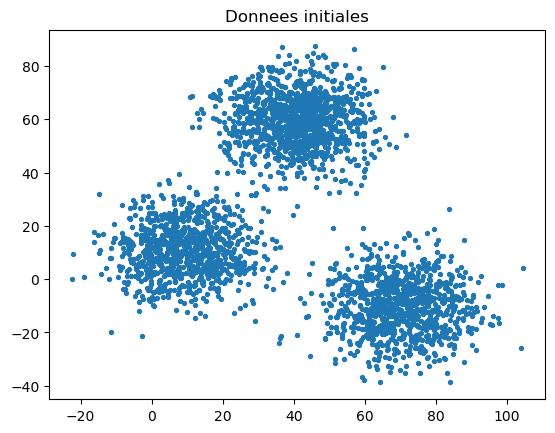

In [32]:
#Parser un fichier de donnees au format arff

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0,f1,s=8)
plt.title("Donnees initiales")
plt.show()

### Clustering k-Means et k-Medoids 

Appel KMeans pour une valeur fixee de k
0.6945587736089913


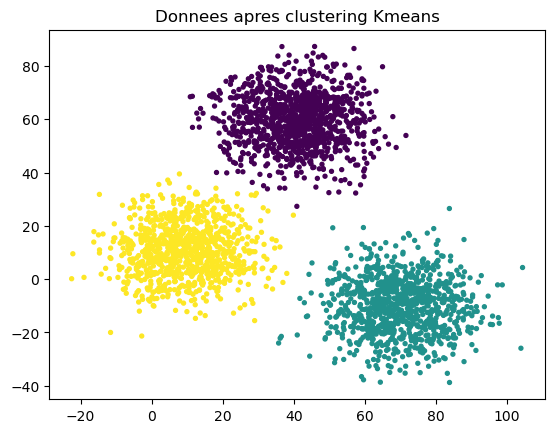

nv clusters = 3 , nb iter = 3 , ...... runtime =  40.45 ms


In [38]:
def test(data,f0,f1):
    print("Appel KMeans pour une valeur fixee de k")
    tps1 = time.time()
    k=3
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(data)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    
    print(metrics.silhouette_score(data, labels))
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nv clusters =",k,", nb iter =", iteration,", ...... runtime = ", round((tps2-tps1)*1000,2),"ms")

test(data,f0,f1)

### Intérets de la méthode K-means 

Appel KMeans pour une valeur fixee de k
0.5868172229463942


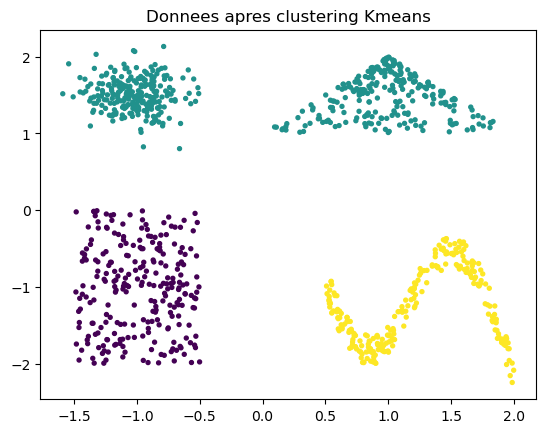

nv clusters = 3 , nb iter = 2 , ...... runtime =  27.76 ms
Appel KMeans pour une valeur fixee de k
0.4266543571202791


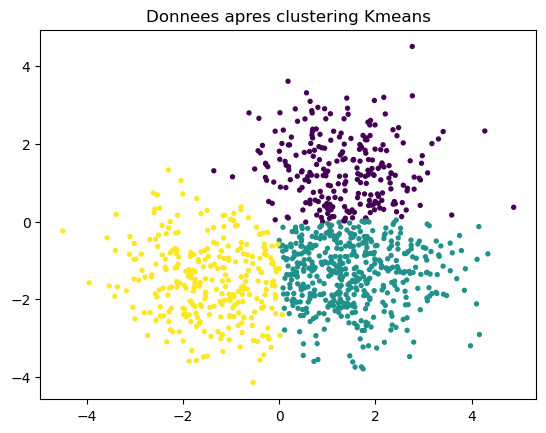

nv clusters = 3 , nb iter = 8 , ...... runtime =  42.85 ms
Appel KMeans pour une valeur fixee de k
0.4113671178411772


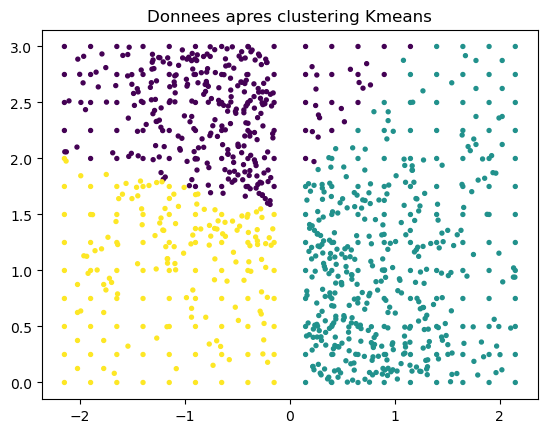

nv clusters = 3 , nb iter = 8 , ...... runtime =  47.73 ms


In [39]:
# Set de certains jeux de données pour voir les effets de la méthodes k-means 

databrut2 = arff.loadarff(open(path+"shapes.arff",'r'))
databrut4 = arff.loadarff(open(path+"threenorm.arff",'r'))
databrut5 = arff.loadarff(open(path+"wingnut.arff",'r'))

data2 = [[x[0],x[1]] for x in databrut2[0]]
f0 = [f[0] for f in data2]
f1 = [f[1] for f in data2]
test(data2,f0,f1)

data4 = [[x[0],x[1]] for x in databrut4[0]]
f0 = [f[0] for f in data4]
f1 = [f[1] for f in data4]

test(data4,f0,f1)

data5 = [[x[0],x[1]] for x in databrut5[0]]
f0 = [f[0] for f in data5]
f1 = [f[1] for f in data5]
test(data5,f0,f1)

### Limites de la méthode K-means 

Appel KMeans pour une valeur fixee de k
0.38312476192951295


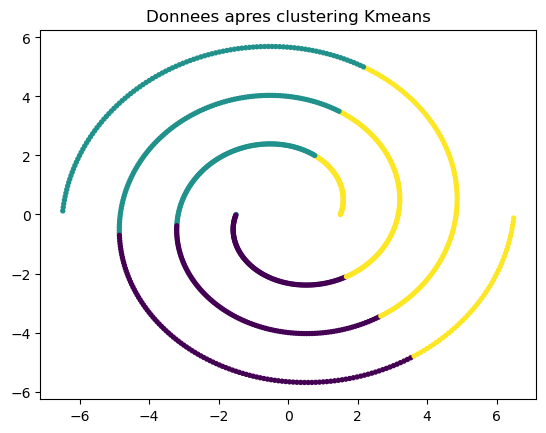

nv clusters = 3 , nb iter = 6 , ...... runtime =  44.68 ms
Appel KMeans pour une valeur fixee de k
0.6393006957752178


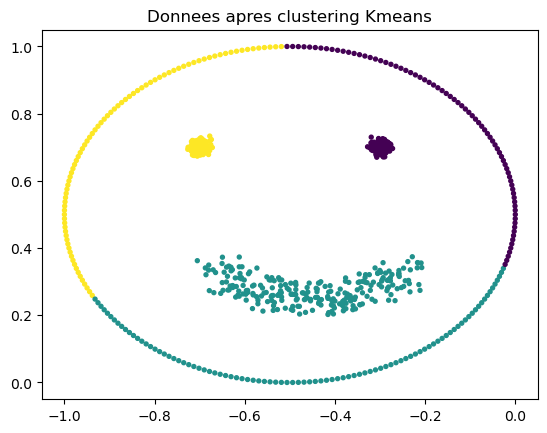

nv clusters = 3 , nb iter = 5 , ...... runtime =  70.08 ms
Appel KMeans pour une valeur fixee de k
0.575413002553207


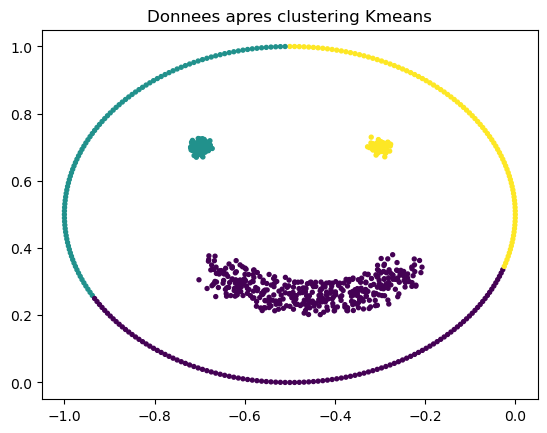

nv clusters = 3 , nb iter = 6 , ...... runtime =  54.1 ms


In [40]:
databrut3 = arff.loadarff(open(path+"spiral.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]
test(data3,f0,f1)

databrut3 = arff.loadarff(open(path+"smile1.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]
test(data3,f0,f1)

databrut3 = arff.loadarff(open(path+"smile2.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]
test(data3,f0,f1)

Loss with FasterPAM: 38029.6560504377
0.6945587736089913


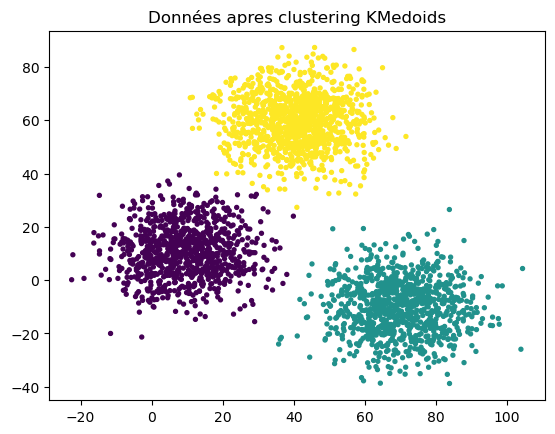

 nb clusters = 3 , nb_iter = 2 , ...... runtime = 117.14 ms


In [45]:
def test2(data,f0,f1):
    tps1 = time.time()
    k=3
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    print('Loss with FasterPAM:', fp.loss)
    
    print(metrics.silhouette_score(data,labels_kmed))
    plt.scatter(f0,f1, c=labels_kmed, s=8)
    plt.title("Données apres clustering KMedoids")
    plt.show()
    print(" nb clusters =",k,", nb_iter =",iter_kmed,", ...... runtime =", round((tps2-tps1)*1000,2),"ms")

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

test2(data, f0,f1)